# MNIST Dataset


## Import information

I focussed task 1 for the examination, but in this jupyter notebook I played a bit around. The conclusion at the end might be interesting.
## Project goal
The Goal of this Project is to develop a neural network which classifies numbers of the MNIST Dataset.
The MNIST Dataset is a collecting fo handwritten one digit numbers.
## Package Import
In the following necessary packages are included into this project.
We will need tensorflow to build our network.
Matplotlib and math are used for validating and plotting our results

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import math

## Data Import
The Keras library already includes a function to download the MNIST Dataset. We will load the data into our variables. The Data is getting normalized to a value between 0 and 1. The Output data is getting classified so that every number is a own class.

In [2]:
# Load training data (reduce training data to 10k samples)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

# Normalize input images (comply with activation function)
x_train, x_validation = x_train / 255.0, x_validation / 255.0

# Convert class vectors to binary class matrices
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_validation = tf.keras.utils.to_categorical(y_validation, num_classes)

## Plotting data Samples



 Plot of the first 25 samples in the MNIST training set


C:\Users\koehn\PycharmProjects\DeepLearning_Task_2\venv\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


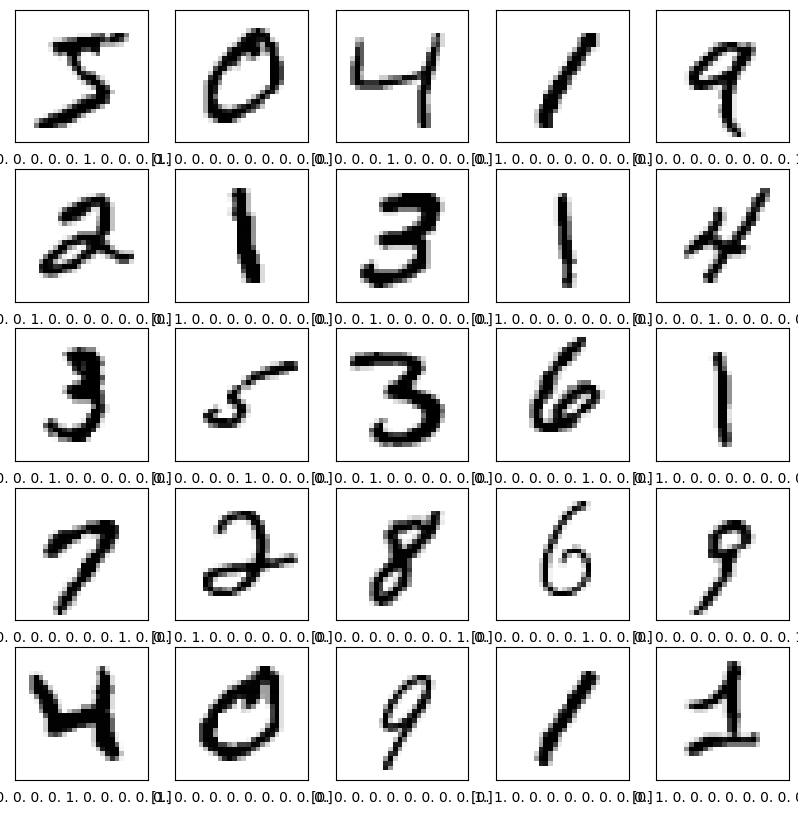

In [3]:
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10, 10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Setting Model Parameters
We are setting the model parameters for all models equal.

In [4]:
learning_rate = 0.01
epochs = 50
batch_size = 64

## Model Definition
In the following different models are defined, and put in a list. In the further we can compare the performance of our models

In [5]:
model_list = [tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),

    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]), tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),

    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]), tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),

    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]), tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]), tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])]

In [6]:
for element in model_list:
    element.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)        

## Setting the optimizer, loss and metrics

In [7]:
for element in model_list:
    element.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Running the model

In [8]:
for element in model_list:
    history = element.fit(x_train,
                          y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          shuffle=True,
                          validation_data=(x_validation, y_validation)
                          )
    loss, validation_acc = element.evaluate(x_validation, y_validation)
    print('validation accuracy:', validation_acc)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy ')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {validation_acc:.3}')
    print()


Epoch 1/50
425/938 [============>.................] - ETA: 7s - loss: 0.2731 - accuracy: 0.9180


KeyboardInterrupt



## Conclusion
We can see that it is relative easy to find a network with an accuracy of at least 98 %. With more testing and fitting of the params surely the accuracy would get a little higher.

More interesting would be a meta network which finds automatically the best network threw a neural network. This would mean that it gets as Inputs the Model params and calculates the accuracy. This would be a more interesting project.
